In [2]:
pip install scikit-surprise


     |████████████████████████████████| 6.5MB 1.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678143 sha256=8c39f15933c42e810b159c0eeb8e9b364bf5b641605f084e322db3abb4aa28b4
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import SVD
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate, KFold
import os
from surprise import Reader
from surprise import KNNBasic
from surprise import accuracy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
%matplotlib inline

In [0]:

path_file = os.path.expanduser('restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')

In [5]:
#Q5 3-folds cross validation
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=SVD()
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9451  0.9466  0.9465  0.9461  0.0007  
MAE (testset)     0.7455  0.7481  0.7463  0.7466  0.0011  
Fit time          4.00    4.11    4.21    4.11    0.08    
Test time         0.24    0.31    0.31    0.29    0.03    


{'fit_time': (3.999323844909668, 4.111658811569214, 4.205389022827148),
 'test_mae': array([0.74548292, 0.74806877, 0.74627564]),
 'test_rmse': array([0.94508089, 0.94661954, 0.94645675]),
 'test_time': (0.24497151374816895, 0.307692289352417, 0.3093748092651367)}

In [6]:
#Q6 PMF 3-folds cross validation
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=SVD(biased= False)
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9651  0.9672  0.9624  0.9649  0.0020  
MAE (testset)     0.7609  0.7637  0.7580  0.7609  0.0024  
Fit time          3.92    4.10    4.10    4.04    0.08    
Test time         0.21    0.20    0.27    0.23    0.03    


{'fit_time': (3.9193837642669678, 4.097250461578369, 4.096596956253052),
 'test_mae': array([0.76090722, 0.76372918, 0.75796989]),
 'test_rmse': array([0.96511317, 0.96721946, 0.96242935]),
 'test_time': (0.20799922943115234, 0.2038745880126953, 0.26630449295043945)}

In [7]:
#Q7 NMF 3-folds cross validation
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=NMF()
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9785  0.9768  0.9727  0.9760  0.0024  
MAE (testset)     0.7678  0.7678  0.7646  0.7667  0.0015  
Fit time          4.31    4.38    4.45    4.38    0.06    
Test time         0.26    0.27    0.19    0.24    0.04    


{'fit_time': (4.306756496429443, 4.384424924850464, 4.446120500564575),
 'test_mae': array([0.76780633, 0.7677695 , 0.76456134]),
 'test_rmse': array([0.97854647, 0.97677134, 0.97273574]),
 'test_time': (0.25963568687438965, 0.26976990699768066, 0.19046592712402344)}

In [8]:
#Q8 User based collaborative filtering
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=KNNBasic(sim_options = {
        'user_based': True 
        })
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9928  0.9842  0.9868  0.9880  0.0036  
MAE (testset)     0.7844  0.7783  0.7800  0.7809  0.0026  
Fit time          0.22    0.28    0.26    0.26    0.02    
Test time         5.00    5.14    5.18    5.10    0.08    


{'fit_time': (0.22361493110656738, 0.28286314010620117, 0.2646219730377197),
 'test_mae': array([0.78441294, 0.77827509, 0.78001107]),
 'test_rmse': array([0.9928082 , 0.98420814, 0.98683741]),
 'test_time': (4.997052192687988, 5.136133909225464, 5.17608118057251)}

In [9]:
#Q9 Item based collaborative filtering
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=KNNBasic(sim_options = {
        'user_based': False 
        })
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9853  0.9890  0.9819  0.9854  0.0029  
MAE (testset)     0.7801  0.7838  0.7780  0.7806  0.0024  
Fit time          0.42    0.42    0.43    0.43    0.01    
Test time         5.81    6.01    5.88    5.90    0.08    


{'fit_time': (0.42402148246765137, 0.4193699359893799, 0.4329032897949219),
 'test_mae': array([0.78007023, 0.78384133, 0.77800689]),
 'test_rmse': array([0.98528167, 0.98896767, 0.98188549]),
 'test_time': (5.8099400997161865, 6.01148533821106, 5.879025220870972)}

In [0]:
#Q10-Q12 Using same data for all algorithms
data=Dataset.load_from_file(path_file, reader=reader)
kf=KFold(n_splits=3)

In [12]:
#SVD
algorithm=SVD()
print("Evaluating RMSE and MAE for SVD")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)

print("==============")

#PMF

algorithm=SVD(biased=False)
print("Evaluating RMSE and MAE for PMF")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

#NMF
algorithm=NMF()
print("Evaluating RMSE and MAE for NMF")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

#User based collaborative filtering
algorithm=KNNBasic(sim_options={'user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

#Item based collaborative filtering
algorithm=KNNBasic(sim_options={'user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

Evaluating RMSE and MAE for SVD
------------
RMSE: 0.9440
MAE:  0.7468
------------
RMSE: 0.9420
MAE:  0.7438
------------
RMSE: 0.9494
MAE:  0.7476
Evaluating RMSE and MAE for PMF
------------
RMSE: 0.9650
MAE:  0.7621
------------
RMSE: 0.9725
MAE:  0.7670
------------
RMSE: 0.9646
MAE:  0.7610
Evaluating RMSE and MAE for NMF
------------
RMSE: 0.9690
MAE:  0.7602
------------
RMSE: 0.9785
MAE:  0.7691
------------
RMSE: 0.9702
MAE:  0.7635
Evaluating RMSE and MAE for User based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9859
MAE:  0.7779
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9880
MAE:  0.7796
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9918
MAE:  0.7859
Evaluating RMSE and MAE for Item based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE:

In [13]:
#Q14 Impact of cosine, pearson, MSD

#Item based collaborative filtering, cosine
algorithm=KNNBasic(sim_options={'name':'cosine','user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions_cosine = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_cosine, verbose=True)
    accuracy.mae(predictions_cosine, verbose=True)
print("==============")

#Item based collaborative filtering, MSD
algorithm=KNNBasic(sim_options={'name':'MSD','user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions_msd = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_msd, verbose=True)
    accuracy.mae(predictions_msd, verbose=True)
print("==============")

#Item based collaborative filtering, pearson
algorithm=KNNBasic(sim_options={'name':'pearson','user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions_pearson = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_pearson, verbose=True)
    accuracy.mae(predictions_pearson, verbose=True)
print("==============")

Evaluating RMSE and MAE for Item based collaborative filtering
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0384
MAE:  0.8224
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0311
MAE:  0.8194
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0366
MAE:  0.8239
Evaluating RMSE and MAE for Item based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9989
MAE:  0.7915
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9793
MAE:  0.7743
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9765
MAE:  0.7736
Evaluating RMSE and MAE for Item based collaborative filtering
Computing the pearson similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0551
MAE:  0.8463
Computing the 

MAE:  0.8403
MAE:  0.7736
MAE:  0.8239
[0.8403205883797308, 0.7736269038301219, 0.8238597883729077]


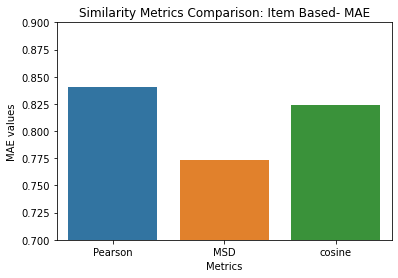

In [14]:
#Q14
vals = [np.mean(accuracy.mae(predictions_pearson, verbose=True)), np.mean(accuracy.mae(predictions_msd, verbose=True)), np.mean(accuracy.mae(predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.7, 0.9)
print(vals)

RMSE: 1.0513
RMSE: 0.9765
RMSE: 1.0366
[1.051278456279851, 0.9764511147975877, 1.036559390040225]


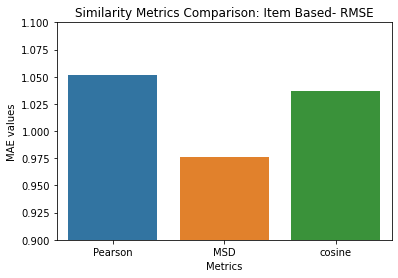

In [15]:
#Q14
vals = [np.mean(accuracy.rmse(predictions_pearson, verbose=True)), np.mean(accuracy.rmse(predictions_msd, verbose=True)), np.mean(accuracy.rmse(predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- RMSE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.9, 1.1)
print(vals)


In [17]:
#Q14
#User based collaborative filtering, cosine
algorithm=KNNBasic(sim_options={'name':'cosine','user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    user_predictions_cosine = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_cosine, verbose=True)
    accuracy.mae(predictions_cosine, verbose=True)
print("==============")

#User based collaborative filtering, MSD
algorithm=KNNBasic(sim_options={'name':'MSD','user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    user_predictions_msd = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_msd, verbose=True)
    accuracy.mae(predictions_msd, verbose=True)
print("==============")

#User based collaborative filtering, pearson
algorithm=KNNBasic(sim_options={'name':'pearson','user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    user_predictions_pearson = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_pearson, verbose=True)
    accuracy.mae(predictions_pearson, verbose=True)
print("==============")

Evaluating RMSE and MAE for User based collaborative filtering
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0366
MAE:  0.8239
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0366
MAE:  0.8239
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0366
MAE:  0.8239
Evaluating RMSE and MAE for User based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9765
MAE:  0.7736
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9765
MAE:  0.7736
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9765
MAE:  0.7736
Evaluating RMSE and MAE for User based collaborative filtering
Computing the pearson similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0513
MAE:  0.8403
Computing the 

MAE:  0.8117
MAE:  0.7777
MAE:  0.8070
[0.8117089080868118, 0.7777213224836812, 0.8070485409196625]


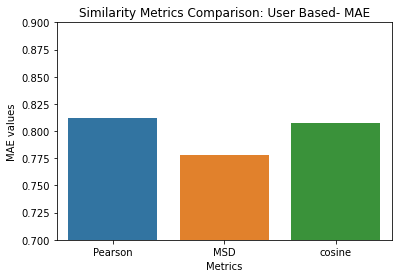

In [18]:
#Q14
vals = [np.mean(accuracy.mae(user_predictions_pearson, verbose=True)), np.mean(accuracy.mae(user_predictions_msd, verbose=True)), np.mean(accuracy.mae(user_predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: User Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.7, 0.9)
print(vals)

RMSE: 1.0513
RMSE: 0.9765
RMSE: 1.0366
[1.051278456279851, 0.9764511147975877, 1.036559390040225]


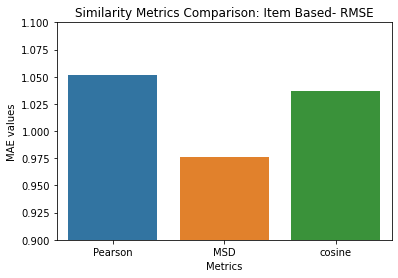

In [19]:
#Q14
vals = [np.mean(accuracy.rmse(predictions_pearson, verbose=True)), np.mean(accuracy.rmse(predictions_msd, verbose=True)), np.mean(accuracy.rmse(predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- RMSE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.9, 1.1)
print(vals)


In [32]:
#Question 15 
#Finding best K for User Based collaborative filtering
user_Based_RMSE_of_different_k = []
user_Based_MAE_of_different_k = []
for i in range(1,20):
    algorithm = KNNBasic(k=i, sim_options = {
            'name': 'MSD',
            'user_based': True 
            })
    print("Evaluating RMSE and MAE for User based collaborative filtering")
    print("________________________________")
    print("K= ", i)
    for trainset, testset in kf.split(data):

        algorithm.fit(trainset)
        predictions = algorithm.test(testset)
        print("------------")
        accuracy.rmse(predictions, verbose=True)
        accuracy.mae(predictions, verbose=True)
    print("==============")
    user_Based_MAE_of_different_k.append(accuracy.mae(predictions, verbose=True))
    user_Based_RMSE_of_different_k.append(accuracy.rmse(predictions, verbose=True))

Evaluating RMSE and MAE for User based collaborative filtering
________________________________
K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.3272
MAE:  0.9799
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.3249
MAE:  0.9762
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.3343
MAE:  0.9853
MAE:  0.9853
RMSE: 1.3343
Evaluating RMSE and MAE for User based collaborative filtering
________________________________
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.1576
MAE:  0.8937
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.1543
MAE:  0.8920
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.1460
MAE:  0.8849
MAE:  0.8849
RMSE: 1.1460
Evaluating RMSE and MAE for User based collaborative filtering
_________

In [33]:
#Question 15 
#Finding best K for Item Based collaborative filtering
item_Based_RMSE_of_different_k = []
item_Based_MAE_of_different_k = []
for i in range(1,20):
    algorithm = KNNBasic( sim_options = {
            'name': 'MSD',
            'user_based': False 
            })
    print("Evaluating RMSE and MAE for Item based collaborative filtering")
    print("________________________________")
    print("K= ", i)
    for trainset, testset in kf.split(data):

        algorithm.fit(trainset)
        predictions = algorithm.test(testset)
        print("------------")
        accuracy.rmse(predictions, verbose=True)
        accuracy.mae(predictions, verbose=True)
    print("==============")
    item_Based_MAE_of_different_k.append(accuracy.mae(predictions, verbose=True))
    item_Based_RMSE_of_different_k.append(accuracy.rmse(predictions, verbose=True))

Evaluating RMSE and MAE for Item based collaborative filtering
________________________________
K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9874
MAE:  0.7824
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9810
MAE:  0.7765
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9855
MAE:  0.7810
MAE:  0.7810
RMSE: 0.9855
Evaluating RMSE and MAE for Item based collaborative filtering
________________________________
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9864
MAE:  0.7798
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9827
MAE:  0.7805
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9900
MAE:  0.7825
MAE:  0.7825
RMSE: 0.9900
Evaluating RMSE and MAE for Item based collaborative filtering
_________

In [37]:
min_RMSE_index = np.argmin(user_Based_RMSE_of_different_k)
print("Best K= ", min_RMSE_index)
print("Best RMSE= ", np.min(user_Based_RMSE_of_different_k))

Best K=  17
Best RMSE=  0.9830461021595481


(0.7, 1.2)

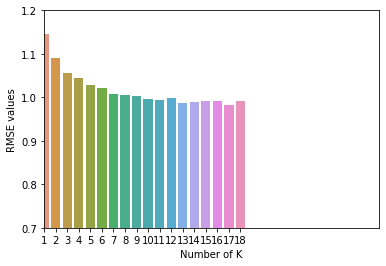

In [39]:
series = pd.Series(name='rmse', data=user_Based_RMSE_of_different_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.7, 1.2)

In [40]:
min_RMSE_index = np.argmin(item_Based_RMSE_of_different_k)
print("Best K= ", min_RMSE_index)
print("Best RMSE= ", np.min(item_Based_RMSE_of_different_k))

Best K=  5
Best RMSE=  0.9787998787622499


(0.8, 1.2)

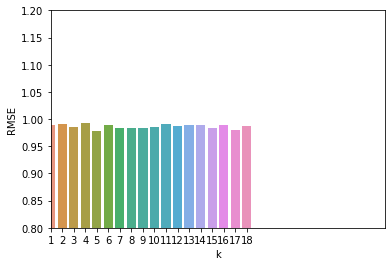

In [41]:
series = pd.Series(name='rmse', data=item_Based_RMSE_of_different_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE')
ax.set_xlabel('k')
ax.set_xlim(1, 30)
ax.set_ylim(.8, 1.2)